In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Adam

Using TensorFlow backend.


#### 載入MNIST資料集

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 活化函數：ReLu, Softmax, 隱藏層1：256個神經元, 損失函數：mse, 優化器選擇：Adam, 學習率設為0.005

In [4]:
nnmodel_mse_1 = Sequential()
nnmodel_mse_1.add(Dense(units=200, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_mse_1.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

nnmodel_mse_1.compile(loss='mse', optimizer=Adam(lr=0.005), metrics=['accuracy'])

#### 將分類值進行One-Hot Encoding數字化

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

X_train_flat = X_train.reshape(60000, 28*28).astype('float32')  
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_normal = X_train_flat/255
x_Test_normal = X_test_flat/255

#### Epochs設為20次

In [6]:
nnTrain_history_mse_1 = nnmodel_mse_1.fit(x=x_Train_normal, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=800, verbose=2)

score_mse_1 = nnmodel_mse_1.evaluate(x_Test_normal, y_TestOneHot)  
print()  
print("\t Accuracy of testing data = {:2.1f}%".format(score_mse_1[1]*100.0))  

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.0206 - acc: 0.8627 - val_loss: 0.0099 - val_acc: 0.9356
Epoch 2/20
 - 1s - loss: 0.0090 - acc: 0.9431 - val_loss: 0.0070 - val_acc: 0.9562
Epoch 3/20
 - 1s - loss: 0.0063 - acc: 0.9599 - val_loss: 0.0059 - val_acc: 0.9620
Epoch 4/20
 - 1s - loss: 0.0049 - acc: 0.9700 - val_loss: 0.0052 - val_acc: 0.9675
Epoch 5/20
 - 1s - loss: 0.0040 - acc: 0.9759 - val_loss: 0.0050 - val_acc: 0.9683
Epoch 6/20
 - 1s - loss: 0.0031 - acc: 0.9819 - val_loss: 0.0046 - val_acc: 0.9697
Epoch 7/20
 - 1s - loss: 0.0027 - acc: 0.9844 - val_loss: 0.0043 - val_acc: 0.9710
Epoch 8/20
 - 1s - loss: 0.0021 - acc: 0.9880 - val_loss: 0.0039 - val_acc: 0.9748
Epoch 9/20
 - 1s - loss: 0.0017 - acc: 0.9907 - val_loss: 0.0042 - val_acc: 0.9727
Epoch 10/20
 - 1s - loss: 0.0016 - acc: 0.9912 - val_loss: 0.0039 - val_acc: 0.9747
Epoch 11/20
 - 1s - loss: 0.0014 - acc: 0.9925 - val_loss: 0.0039 - val

#### =更改損失函數=, 活化函數：ReLu, Softmax, 隱藏層1：256個神經元, 損失函數：categorical_crossentropy, 優化器選擇：Adam, 學習率設為0.005

In [9]:
nnmodel_cc_1 = Sequential()
nnmodel_cc_1.add(Dense(units=200, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_cc_1.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
nnmodel_cc_1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])
nnTrain_history_cc_1 = nnmodel_cc_1.fit(x=x_Train_normal, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=800, verbose=2)

score_cc_1 = nnmodel_cc_1.evaluate(x_Test_normal, y_TestOneHot)  
print()  
print("\t Accuracy of testing data = {:2.1f}%".format(score_cc_1[1]*100.0))  

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.4583 - acc: 0.8730 - val_loss: 0.2180 - val_acc: 0.9374
Epoch 2/20
 - 1s - loss: 0.1852 - acc: 0.9458 - val_loss: 0.1479 - val_acc: 0.9583
Epoch 3/20
 - 1s - loss: 0.1221 - acc: 0.9644 - val_loss: 0.1230 - val_acc: 0.9642
Epoch 4/20
 - 1s - loss: 0.0906 - acc: 0.9736 - val_loss: 0.1057 - val_acc: 0.9678
Epoch 5/20
 - 1s - loss: 0.0691 - acc: 0.9800 - val_loss: 0.1031 - val_acc: 0.9685
Epoch 6/20
 - 1s - loss: 0.0567 - acc: 0.9835 - val_loss: 0.1026 - val_acc: 0.9691
Epoch 7/20
 - 1s - loss: 0.0481 - acc: 0.9859 - val_loss: 0.0904 - val_acc: 0.9734
Epoch 8/20
 - 1s - loss: 0.0363 - acc: 0.9899 - val_loss: 0.0884 - val_acc: 0.9721
Epoch 9/20
 - 1s - loss: 0.0287 - acc: 0.9923 - val_loss: 0.0871 - val_acc: 0.9750
Epoch 10/20
 - 1s - loss: 0.0231 - acc: 0.9944 - val_loss: 0.0905 - val_acc: 0.9732
Epoch 11/20
 - 1s - loss: 0.0183 - acc: 0.9958 - val_loss: 0.0856 - val_acc: 0.9752
Epoch 12/20
 - 1s - loss: 0.0143 - 

#### ==增加隱藏層== 活化函數：ReLu, Softmax, 隱藏層1：256個神經元, 隱藏層2: 100個神經元, 損失函數：mse, 優化器選擇：Adam, 學習率設為0.005

In [10]:
nnmodel_mse_2 = Sequential()
nnmodel_mse_2.add(Dense(units=200, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_mse_2.add(Dense(units=100, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_mse_2.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
nnmodel_mse_2.compile(loss='mse', optimizer=Adam(lr=0.005), metrics=['accuracy'])
nnTrain_history_mse_2 = nnmodel_mse_2.fit(x=x_Train_normal, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=800, verbose=2)

score_mse_2 = nnmodel_mse_2.evaluate(x_Test_normal, y_TestOneHot)  
print()  
print("\t Accuracy of testing data = {:2.1f}%".format(score_mse_2[1]*100.0))  

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.0228 - acc: 0.8460 - val_loss: 0.0106 - val_acc: 0.9302
Epoch 2/20
 - 1s - loss: 0.0085 - acc: 0.9459 - val_loss: 0.0067 - val_acc: 0.9573
Epoch 3/20
 - 1s - loss: 0.0057 - acc: 0.9637 - val_loss: 0.0058 - val_acc: 0.9622
Epoch 4/20
 - 1s - loss: 0.0044 - acc: 0.9731 - val_loss: 0.0050 - val_acc: 0.9681
Epoch 5/20
 - 1s - loss: 0.0036 - acc: 0.9776 - val_loss: 0.0049 - val_acc: 0.9687
Epoch 6/20
 - 1s - loss: 0.0030 - acc: 0.9816 - val_loss: 0.0047 - val_acc: 0.9696
Epoch 7/20
 - 1s - loss: 0.0025 - acc: 0.9850 - val_loss: 0.0043 - val_acc: 0.9721
Epoch 8/20
 - 1s - loss: 0.0020 - acc: 0.9879 - val_loss: 0.0042 - val_acc: 0.9728
Epoch 9/20
 - 1s - loss: 0.0017 - acc: 0.9901 - val_loss: 0.0040 - val_acc: 0.9732
Epoch 10/20
 - 1s - loss: 0.0014 - acc: 0.9915 - val_loss: 0.0039 - val_acc: 0.9742
Epoch 11/20
 - 1s - loss: 0.0015 - acc: 0.9915 - val_loss: 0.0042 - val_acc: 0.9732
Epoch 12/20
 - 1s - loss: 0.0014 - 

#### ==增加隱藏層== 活化函數：ReLu, Softmax, 隱藏層1：256個神經元, 隱藏層2: 100個神經元, 損失函數：categorical_crossentropy, 優化器選擇：Adam, 學習率設為0.005

In [11]:
nnmodel_cc_2 = Sequential()
nnmodel_cc_2.add(Dense(units=200, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_cc_2.add(Dense(units=100, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_cc_2.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
nnmodel_cc_2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])
nnTrain_history_cc_2 = nnmodel_cc_2.fit(x=x_Train_normal, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=800, verbose=2)

score_cc_2 = nnmodel_cc_2.evaluate(x_Test_normal, y_TestOneHot)  
print()  
print("\t Accuracy of testing data = {:2.1f}%".format(score_cc_2[1]*100.0))  

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.4924 - acc: 0.8595 - val_loss: 0.1967 - val_acc: 0.9437
Epoch 2/20
 - 1s - loss: 0.1618 - acc: 0.9526 - val_loss: 0.1343 - val_acc: 0.9588
Epoch 3/20
 - 1s - loss: 0.1064 - acc: 0.9683 - val_loss: 0.1064 - val_acc: 0.9681
Epoch 4/20
 - 1s - loss: 0.0765 - acc: 0.9768 - val_loss: 0.0958 - val_acc: 0.9701
Epoch 5/20
 - 1s - loss: 0.0582 - acc: 0.9823 - val_loss: 0.1003 - val_acc: 0.9699
Epoch 6/20
 - 1s - loss: 0.0458 - acc: 0.9856 - val_loss: 0.0924 - val_acc: 0.9743
Epoch 7/20
 - 1s - loss: 0.0360 - acc: 0.9887 - val_loss: 0.0958 - val_acc: 0.9733
Epoch 8/20
 - 1s - loss: 0.0251 - acc: 0.9924 - val_loss: 0.0989 - val_acc: 0.9728
Epoch 9/20
 - 1s - loss: 0.0217 - acc: 0.9932 - val_loss: 0.0928 - val_acc: 0.9757
Epoch 10/20
 - 1s - loss: 0.0165 - acc: 0.9951 - val_loss: 0.0964 - val_acc: 0.9752
Epoch 11/20
 - 1s - loss: 0.0119 - acc: 0.9965 - val_loss: 0.1006 - val_acc: 0.9750
Epoch 12/20
 - 1s - loss: 0.0093 - 

In [12]:
nnmodel_SGD_1 = Sequential()
nnmodel_SGD_1.add(Dense(units=200, input_dim=784, kernel_initializer='normal', activation='relu'))
#nnmodel_SGD_1.add(Dense(units=100, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_SGD_1.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
nnmodel_SGD_1.compile(loss='mse', optimizer=SGD(lr=1), metrics=['accuracy'])
nnTrain_history_SGD_1 = nnmodel_SGD_1.fit(x=x_Train_normal, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=800, verbose=2)

score_SGD_1 = nnmodel_SGD_1.evaluate(x_Test_normal, y_TestOneHot)  
print()  
print("\t Accuracy of testing data = {:2.1f}%".format(score_SGD_1[1]*100.0))  

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.0829 - acc: 0.4062 - val_loss: 0.0712 - val_acc: 0.5868
Epoch 2/20
 - 1s - loss: 0.0578 - acc: 0.6489 - val_loss: 0.0449 - val_acc: 0.7359
Epoch 3/20
 - 1s - loss: 0.0381 - acc: 0.7983 - val_loss: 0.0298 - val_acc: 0.8516
Epoch 4/20
 - 1s - loss: 0.0279 - acc: 0.8509 - val_loss: 0.0232 - val_acc: 0.8748
Epoch 5/20
 - 1s - loss: 0.0233 - acc: 0.8679 - val_loss: 0.0200 - val_acc: 0.8861
Epoch 6/20
 - 1s - loss: 0.0207 - acc: 0.8786 - val_loss: 0.0182 - val_acc: 0.8938
Epoch 7/20
 - 1s - loss: 0.0191 - acc: 0.8859 - val_loss: 0.0170 - val_acc: 0.8993
Epoch 8/20
 - 1s - loss: 0.0179 - acc: 0.8913 - val_loss: 0.0160 - val_acc: 0.9033
Epoch 9/20
 - 1s - loss: 0.0170 - acc: 0.8963 - val_loss: 0.0153 - val_acc: 0.9067
Epoch 10/20
 - 1s - loss: 0.0163 - acc: 0.9000 - val_loss: 0.0148 - val_acc: 0.9087
Epoch 11/20
 - 1s - loss: 0.0157 - acc: 0.9033 - val_loss: 0.0143 - val_acc: 0.9108
Epoch 12/20
 - 1s - loss: 0.0152 - 

In [13]:
nnmodel_SGD_2 = Sequential()
nnmodel_SGD_2.add(Dense(units=200, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_SGD_2.add(Dense(units=100, input_dim=784, kernel_initializer='normal', activation='relu'))
nnmodel_SGD_2.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
nnmodel_SGD_2.compile(loss='mse', optimizer=SGD(lr=1), metrics=['accuracy'])
nnTrain_history_SGD_2 = nnmodel_SGD_2.fit(x=x_Train_normal, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=800, verbose=2)

score_SGD_2 = nnmodel_SGD_2.evaluate(x_Test_normal, y_TestOneHot)  
print()  
print("\t Accuracy of testing data = {:2.1f}%".format(score_SGD_2[1]*100.0))  

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.0892 - acc: 0.2639 - val_loss: 0.0883 - val_acc: 0.3619
Epoch 2/20
 - 1s - loss: 0.0865 - acc: 0.4415 - val_loss: 0.0838 - val_acc: 0.5028
Epoch 3/20
 - 1s - loss: 0.0763 - acc: 0.5055 - val_loss: 0.0652 - val_acc: 0.5790
Epoch 4/20
 - 1s - loss: 0.0535 - acc: 0.6872 - val_loss: 0.0409 - val_acc: 0.7715
Epoch 5/20
 - 1s - loss: 0.0348 - acc: 0.8013 - val_loss: 0.0270 - val_acc: 0.8499
Epoch 6/20
 - 1s - loss: 0.0255 - acc: 0.8527 - val_loss: 0.0213 - val_acc: 0.8737
Epoch 7/20
 - 1s - loss: 0.0212 - acc: 0.8739 - val_loss: 0.0183 - val_acc: 0.8895
Epoch 8/20
 - 1s - loss: 0.0188 - acc: 0.8852 - val_loss: 0.0167 - val_acc: 0.8957
Epoch 9/20
 - 1s - loss: 0.0173 - acc: 0.8921 - val_loss: 0.0156 - val_acc: 0.9004
Epoch 10/20
 - 1s - loss: 0.0163 - acc: 0.8979 - val_loss: 0.0149 - val_acc: 0.9054
Epoch 11/20
 - 1s - loss: 0.0156 - acc: 0.9015 - val_loss: 0.0142 - val_acc: 0.9088
Epoch 12/20
 - 1s - loss: 0.0149 - 

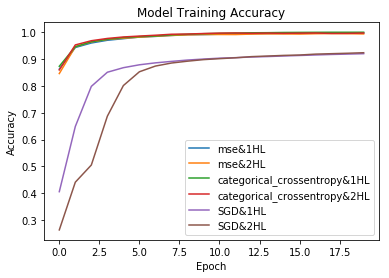

In [14]:
plt.plot(nnTrain_history_mse_1.history["acc"])
plt.plot(nnTrain_history_mse_2.history["acc"])
plt.plot(nnTrain_history_cc_1.history["acc"])
plt.plot(nnTrain_history_cc_2.history["acc"])
plt.plot(nnTrain_history_SGD_1.history["acc"])
plt.plot(nnTrain_history_SGD_2.history["acc"])

plt.title("Model Training Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["mse&1HL","mse&2HL", "categorical_crossentropy&1HL","categorical_crossentropy&2HL","SGD&1HL","SGD&2HL"], loc="best")
plt.show()

#### 1. 實驗組合了比較不同的損失函數(loss function)：mse、categorical_crossentropy、優化器(optimizer)：Adam、SGD及隱藏層數。
#### 2. 結果顯示以不同的loss funtion加上增加隱藏層數，對預測準確度的提升不一定有幫助，而優化器從Adam改為SGD後準確率就有很明顯的下降
#### 3. 就SGD本身，多增加一層隱藏層後及調整學習率後，準確率就在相同的epoch次數內明顯的提升。
#### 4. 所以結論還是要多嘗試不同的loss function、optimazier、learn rate，才能找出最佳的組合。